<center>![image](cvi.png)</center>

<h1><center>Session 1</center></h1>


# Colour Space and Image  Transformations


# Image as Functions

 In its most general form, an 
image 
is a function 
f from
R^2
to R

*  f
( 
x, y 
) gives the intensity of a channel at position (
x, y
) 
* Has finite range
*  A color image is just three functions pasted together:
f
( 
x, y 
) = (
f
r
( 
x, y 
),
f
g
( 
x, y 
),
f
b
( 
x, y 
))

We usually operate on **digital(discrete)** images.
* We **sample** the space on a regular grid
* Then we **quantize** each sample(to the nearest integer)

**Samples == Pixels** 


        
    

![alt text](https://i.pinimg.com/236x/4a/ce/60/4ace609e2ba29dd9a7fc51e5bd234d66--pokemon-perler-beads-pokemon-pearler-bead-patterns.jpg)

An example to demonstrate how pixels concatinate to form an image

# Colour Space

In this section, we will cover some important color spaces used in computer vision. We will not describe the theory behind them as it can be found on Wikipedia. Instead, we will develop a basic intuition and learn some important properties which will be useful in making decisions later on.

Let us load 2 images of the same cube. It will get loaded in BGR format by default. We can convert between different colorspaces using the OpenCV function cvtColor() as will be shown later.

In [1]:
import cv2

bright = cv2.imread('cube1.jpg')
dark = cv2.imread('cube2.jpg')

The first image is taken under outdoor conditions with bright sunlight, while the second is taken indoor with normal lighting conditions.

![alt text](https://www.learnopencv.com/wp-content/uploads/2017/05/two-cubes.png)
                   
   **Figure 1 : Two images of the same cube taken under different illumination**

## The RGB Color Space

The RGB colorspace has the following properties

*   It is an additive colorspace where colors are obtained by a linear combination of Red, Green, and Blue values.
*   The three channels are correlated by the amount of light hitting the surface.

Range of Pixel values for each component : [0,255]






In [ ]:
# Blue channel
cv2.imshow('B',bright[:,:,0])
cv2.imshow('B',dark[:,:,0])

# Greeen channel
cv2.imshow('G',bright[:,:,1])
cv2.imshow('G',dark[:,:,1])

# Red channel
cv2.imshow('R',bright[:,:,2])
cv2.imshow('R',dark[:,:,2])

Let us split the two images into their R, G and B components and observe them to gain more insight into the color space.

![alt text](https://www.learnopencv.com/wp-content/uploads/2017/05/components-bgr.png)

**Figure 2 : Different Channels Blue ( B ), Green ( G ), Red ( R ) of the RGB color space shown separately**

**Observations :**

If you look at the blue channel, it can be seen that the blue and white pieces look similar in the image under indoor lighting conditions but there is a clear difference in the first image. This kind of non-uniformity makes color based segmentation very difficult in this color space. Further, there is an overall difference between the values of the two images. Below we have summarized the inherent problems associated with the RGB Color space:

* significant perceptual non-uniformity.
* mixing of chrominance ( Color related information ) and luminance ( Intensity related information ) data.


## The LAB Color-Space

The Lab color space has three components.


1.   L – Lightness ( Intensity ).
2.   a – color component ranging from Green to Magenta.
3.   b – color component ranging from Blue to Yellow.

The Lab color space is quite different from the RGB color space. In RGB color space the color information is separated into three channels but the same three channels also encode brightness information. On the other hand, in Lab color space, the L channel is independent of color information and encodes brightness only. The other two channels encode color.

Range  : L = [0, 100], A = [-127, 128], B = [-127, 128]







It has the following properties.
* Perceptually uniform color space which approximates how we perceive color.
* Independent of device ( capturing or displaying ).
* Is related to the RGB color space by a complex transformation equation.

Let us see the two images in the Lab color space separated into three channels.


In [2]:
brightLAB = cv2.cvtColor(bright, cv2.COLOR_BGR2LAB)
darkLAB = cv2.cvtColor(dark, cv2.COLOR_BGR2LAB)

# L channel
cv2.imshow('L',brightLAB[:,:,0])
cv2.imshow('L',darkLAB[:,:,0])

# A channel
cv2.imshow('A',brightLAB[:,:,1])
cv2.imshow('A',darkLAB[:,:,1])

# B channel
cv2.imshow('B',brightLAB[:,:,2])
cv2.imshow('B',darkLAB[:,:,2])

NameError: name 'cv2' is not defined

![alt text](https://www.learnopencv.com/wp-content/uploads/2017/05/components-lab.png)

**Figure 3 : The Lightness ( L ), and color components ( A, B ) in LAB Color space.**





**Observations :**
* It is pretty clear from the figure that the change in illumination has mostly affected the L component.
* The A and B components which contain the color information did not undergo massive changes.
* The respective values of Green, Orange and Red ( which are the extremes of the A Component ) has not changed in the B Component and similarly the respective values of Blue and Yellow ( which are the extremes of the B Component ) has not changed in the A component.



## The YCrCb Color-Space

The YCrCb color space is derived from the RGB color space and has the following three components.
1.   Y – Luminance or Luma component obtained from RGB after gamma correction.
2.   Cr = R – Y ( how far is the red component from Luma ).
3.   Cb = B – Y ( how far is the blue component from Luma ).

Range : Y = [16,235] , Cr = [16,240] , Cb = [16,240]




This color space has the following properties.
* Separates the luminance and chrominance components into different channels.
* Mostly used in compression ( of Cr and Cb components ) for TV Transmission.


In [0]:
brightYCB = cv2.cvtColor(bright, cv2.COLOR_BGR2YCrCb)
darkYCB = cv2.cvtColor(dark, cv2.COLOR_BGR2YCrCb)

#Y channel
cv2.imshow('Y',brightYCB[:,:,0])
cv2.imshow('Y',darkYCB[:,:,0])

# Cr channel
cv2.imshow('Cr',brightYCB[:,:,1])
cv2.imshow('Cr',darkYCB[:,:,1])

# Cb channel
cv2.imshow('Cb',brightYCB[:,:,2])
cv2.imshow('Cb',darkYCB[:,:,2])

![alt text](https://www.learnopencv.com/wp-content/uploads/2017/05/components-ycrcb.png)

**Figure 4 : Luma ( Y ), and Chroma ( Cr, Cb ) components in YCrCb color space.**




**Observations :**
* Similar observations as LAB can be made for Intensity and color components with regard to Illumination changes.
* Perceptual difference between Red and Orange is less even in the outdoor image as compared to LAB.
* White has undergone change in all 3 components.

## The HSV Color Space

The HSV color space has the following three components
1.   H – Hue ( Dominant Wavelength )(units in degrees).
2.   S – Saturation ( Purity / shades of the color )(in percentage).
3.   V – Value ( Intensity/Brightness )(in percentage).

Its main property is that it uses only one channel to describe color (H), making it very intuitive to specify color.

Range :  H = [0,360] , S = [0,255] or [{0},{1}] (where 0 is gray and 1 is a primary colour), V = [0,255] (0 is black,255 - True colour)

The H, S and V components of the two images are shown below.

In [0]:
brightHSV = cv2.cvtColor(bright, cv2.COLOR_BGR2HSV)
darkHSV = cv2.cvtColor(dark, cv2.COLOR_BGR2HSV)

# H channel
cv2.imshow('H',brightHSV[:,:,0])
cv2.imshow('H',darkHSV[:,:,0])

# S channel
cv2.imshow('S',brightHSV[:,:,1])
cv2.imshow('S',darkHSV[:,:,1])

# H channel
cv2.imshow('V',brightHSV[:,:,2])
cv2.imshow('V',darkHSV[:,:,2])

![alt text](https://www.learnopencv.com/wp-content/uploads/2017/05/components-hsv.png)

**Figure 5 : Hue ( H ), Saturation ( S ) and Value ( V ) components in HSV color space.**




**Observations :**
* The H Component is very similar in both the images which indicates the color information is intact even under illumination changes.
* The S component is also very similar in both images.
* The V Component captures the amount of light falling on it thus it changes due to illumination changes.
* There is drastic difference between the values of the red piece of outdoor and Indoor image. This is because Hue is represented as a circle and red is at the starting angle. So, it may take values between [300, 360] and again [0, 60].


## Relation between RGB and HSV

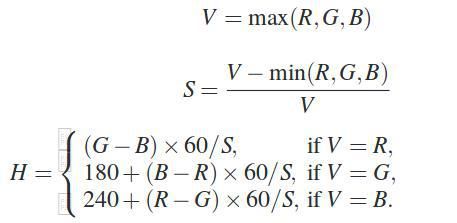

## Changing from one colour space to another

Let XYZ be the colour space code

BGR to XYZ ---> cv2.cvtColor(img,cv2.COLOR_BGR2XYZ)

In the case of hsv , XYZ = HSV

Similarly you can do for other colour spaces as well !


## Simple Object Tracking using Colour Spaces

Now we know how to convert BGR image to HSV, we can use this to extract a colored object. In HSV, it is more easier to represent a color than RGB color-space. In our application, we will try to extract a blue colored object. So here is the method:
1. Take each frame of the video
* Convert from BGR to HSV color-space
* We threshold the HSV image for a range of blue color
* Now extract the blue object alone, we can do whatever on that image we want.



In [2]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

error: /tmp/build/80754af9/opencv_1512491966560/work/modules/highgui/src/window.cpp:611: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage


Below image shows tracking of the blue object:

![alt text](https://docs.opencv.org/3.0-beta/_images/frame.jpg)

This is the simplest method in object tracking. Once you learn functions of contours, you can do plenty of things like find centroid of this object and use it to track the object, draw diagrams just by moving your hand in front of camera and many other funny stuffs.





## How to find HSV values to track?

It is very simple and you can use the same function, cv2.cvtColor(). Instead of passing an image, you just pass the BGR values you want. For example, to find the HSV value of Green, try following commands in Python terminal:

In [3]:
>>> green = np.uint8([[[0,255,0 ]]])
>>> hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
>>> print hsv_green
[[[ 60 255 255]]]

Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively. 
Apart from this method, you can use any image editing tools like GIMP or any online converters to find these values, but don’t forget to adjust the HSV ranges.

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(hsv_green)? (<ipython-input-3-33b5721c0aac>, line 3)

## Homogeneous coordinates


Short version: Homogenous coordinates for a n-dimensional space consist of tuples with n+1 coordinates, where the extra coordinate is kept at a special value (one says it is normalized).
The extra dimension for matrices and vectors allows to model n-dimensional affine transformations as (n+1)×(n+1) matrices acting on n+1-dimensional vectors.




Many of the useful transformations in 2D or 3D graphics are affine transformations, not linear. To still be able to use the convenient matrices one can use homogeneous coordinates in 3
or 4 dimensions, where the last coordinate is normalized to 1.



## Homography


Consider two images of a plane (top of the book) shown in Figure 1. The red dot represents the same physical point in the two images. In computer vision jargon we call these corresponding points. Figure 1. shows four corresponding points in four different colors — red, green, yellow and orange. A Homography is a transformation ( a 3×3 matrix ) that maps the points in one image to the corresponding points in the other image.




![alt text](https://www.learnopencv.com/wp-content/uploads/2016/01/homography-example-768x511.jpg)





![alt text](http://www.corrmap.com/img/features/Omogr.gif)

Now since a homography is a 3×3 matrix we can write it as

![alt text](https://www.learnopencv.com/wp-content/ql-cache/quicklatex.com-0e501a99a732aad3f7a911294b942aa0_l3.png)



Let us consider the first set of corresponding points — (x_1,y_1) in the first image and (x_2,y_2)} in the second image. Then, the Homography H maps them in the following way

![alt text](https://www.learnopencv.com/wp-content/ql-cache/quicklatex.com-5ed4910ec273ad30626f55eefe5b0373_l3.png)

 

## Image Alignment Using Homography

The above equation is true for ALL sets of corresponding points as long as they lie on the same plane in the real world. In other words you can apply the homography to the first image and the book in the first image will get aligned with the book in the second image! See Figure 2.




![alt text](https://www.learnopencv.com/wp-content/uploads/2016/01/homography-alignment-768x511.jpg)








But what about points that are not on the plane ? Well, they will NOT be aligned by a homography as you can see in Figure 2. But wait, what if there are two planes in the image ? Well, then you have two homographies — one for each plane.

## How to calculate a Homography ?

To calculate a homography between two images, you need to know at least 4 point correspondences between the two images. If you have more than 4 corresponding points, it is even better. OpenCV will robustly estimate a homography that best fits all corresponding points. Usually, these point correspondences are found automatically by matching features like SIFT or SURF between the images, but in this post we are simply going to click the points by hand.

In [2]:
#Uploading the required images
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving book.jpg to book.jpg
User uploaded file "book.jpg" with length 97199 bytes


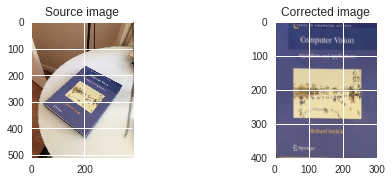

In [12]:
#!/usr/bin/env python
 
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
if __name__ == '__main__' :
 
    # Read source image.
    im_src = cv2.imread('book.jpg')
    # Four corners of the book in source image
    pts_src = np.array([[46, 308], [204, 166], [340, 238],[201, 426]])
 
 
    # Read destination image.
    #im_dst = cv2.imread('book1.jpg')
    # Four corners of the book in destination image.
    pts_dst = np.array([[0, 399],[0, 0],[299, 0],[299, 399]])
 
    # Calculate Homography
    h, status = cv2.findHomography(pts_src, pts_dst)
     
    # Warp source image to destination based on homography
    im_out = cv2.warpPerspective(im_src, h, (300,400))   #300 and 400 are the dimensions of the output image
     
    # Display images
    RGB_im_src = cv2.cvtColor(im_src, cv2.COLOR_BGR2RGB)
    RGB_im_out = cv2.cvtColor(im_out, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.subplot(221)
    plt.imshow(RGB_im_src)
    plt.title('Source image')

    plt.subplot(222)
    plt.imshow(RGB_im_out)
    plt.title('Corrected image')

    plt.show()


# Geometric Transformations


In this section, we will learn about the various transformations that can be applied to images. OpenCV provides two transformation functions, cv2.warpAffine and cv2.warpPerspective. With these, you can have all kinds of transformations. cv2.warpAffine takes a 2x3 transformation matrix while cv2.warpPerspective takes a 3x3 transformation matrix as input.

We will use this image to test our transformations. Note that the image consists of grid lines. These lines will help us visualise how the different transformations occur.
![messi5.jpg](attachment:messi5.jpg)

In [3]:
# Importing OpenCV, matplotlib and numpy
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('messi5.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title('my picture')
plt.show()

error: ignored

# Affine Transformations


It is any transformation that can be expressed in the form of a matrix multiplication (linear transformation) followed by a vector addition (translation).
So we can use an Affine Transformation to express:
-  Rotations (linear transformation)
-  Translations (vector addition)
-  Scale operations (linear transformation)
followed by a vector addition (translation).A linear transformation is in general defined as a function which takes in the coordinates of a point on a plane, and returns another point, with some special properties.

The usual way to represent an Affine Transform is by using a 2×3 matrix.


## Scaling



Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes. You can resize an input image either of following methods:

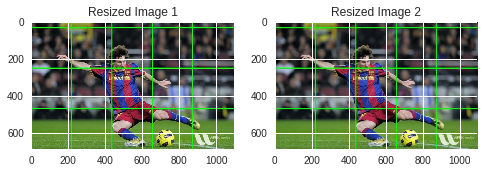

In [3]:
res1 = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
RGB_res1 = cv2.cvtColor(res1, cv2.COLOR_BGR2RGB)

#OR
height, width = img.shape[:2]
res2 = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_LINEAR)
RGB_res2 = cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(221)
plt.imshow(RGB_res1)
plt.title('Resized Image 1')

plt.subplot(222)
plt.imshow(RGB_res2)
plt.title('Resized Image 2')

plt.show()






## Translation



Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (t_x,t_y), you can create the transformation matrix **M** as follows:

M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}

You can take make it into a Numpy array of type np.float32 and pass it into cv2.warpAffine() function. See below example for a shift of (100,50):

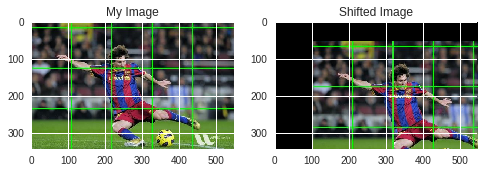

In [4]:
rows,cols,chan = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
RGB_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(221)
plt.imshow(RGB_img)
plt.title('My Image')

plt.subplot(222)
plt.imshow(RGB_dst)
plt.title('Shifted Image')

plt.show()

### Rotation



Rotation of an image for an angle $\theta$ is achieved by the transformation matrix of the form

M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}

where:

\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}

To find this transformation matrix, OpenCV provides a function, cv2.getRotationMatrix2D. Check below example which rotates the image by 90 degree with respect to center without any scaling.

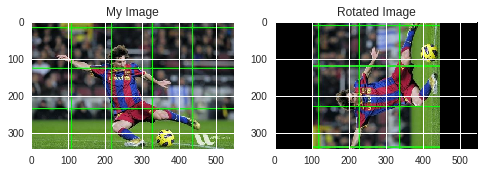

In [5]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
RGB_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(221)
plt.imshow(RGB_img)
plt.title('My Image')

plt.subplot(222)
plt.imshow(RGB_dst)
plt.title('Rotated Image')

plt.show()





In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.

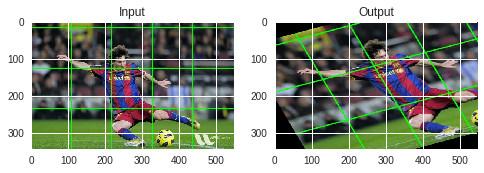

In [6]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))
RGB_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(RGB_img),plt.title('Input')
plt.subplot(122),plt.imshow(RGB_dst),plt.title('Output')
plt.show()


## Perspective Transformations



Another very useful type of image transformation is the perspective transform. An intuitive way to think about this transform is the following: change the camera position from which the original image was taken, and then take a new photo of the same three dimensional object to get the transformed image. This method will not always work because the change in perspective(moving the camera) might uncover previously occluded objects. So the perspective transform of 2D images should be thought of as camera movements which do not alter the occlusion of objects.




Mathematically, perspective transforms are represented as matrices. The details of the mathematics behind these transforms can get quite involved, so it will not be covered. The way to describe a perspective transform is to look at what happens to a set of 4 points out of which no three are collinear. If you can decide where any such 4 points will be mapped to, the perspective transform is determined. OpenCV has a handy function to get us the matrix associated with this transform from the maps of 4 points. 




For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

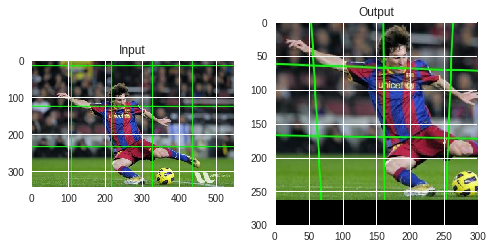

In [7]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))
RGB_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(RGB_img),plt.title('Input')
plt.subplot(122),plt.imshow(RGB_dst),plt.title('Output')
plt.show()



Perspective transforms have many applications. For instance, we can pickout certain parts of an image and remove unwanted background. In this image, the wall painting is actually a trapezoid. 


![alt text](https://iitmcvg.github.io/assets/images/documentation/computer_vision/Image%20Transformations_files/Image%20Transformations_12_1.png)




Notice that in the image, the painting is actually a trapezoid. This means that we can’t just crop out the unecessary parts and be left with a picture of the painting. To get a result which is a square image, we need to use a perspective transform which maps the corners of the painting to the corners of a square. To find the corners of the painting, we will, for now, just open up the image in paint and look at the coordinates of the corners manually. There are algorithms to automatically find these corners, but we will not look into them in this notebook. Once we have found the corners of the painting, we can map them to the corners of square through a perspective transform. Then, we will get a resultant image with only the painting, as we wanted. This process is performed below:

In [8]:
sample = cv2.imread('sample2.png')
print (sample.shape)


(548, 412, 3)


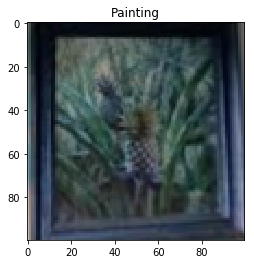

In [0]:
pts1 = np.float32([[140,130],[145,313],[318,147],[310,312]])
# Manually found corners of the painting. The corners are slightly away from the actual corners
# so that the frame can be clearly visible.
pts2 = np.float32([[0,0],[0,100],[100,0],[100,100]])
# Corners of a square.

M = cv2.getPerspectiveTransform(pts1,pts2) # Get the perspective transform matrix
dst = cv2.warpPerspective(sample,M,(100,100)) # Apply it
RGB_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_dst)
plt.title('Painting')
plt.show()
